In [2]:
from deap import gp, base, creator, tools, algorithms

def add(x):
    return '+' + x

def sub(x):
    return '-' + x

def brackets(a,b,c):
    return a + '[' + b + ']' + c

def F(x):
    return 'F' + x

pset = gp.PrimitiveSet("MAIN", 1)
pset.addPrimitive(add, 1)
pset.addPrimitive(sub, 1)
pset.addPrimitive(F, 1)
pset.addPrimitive(brackets, 3)
pset.addTerminal('')
pset.renameArguments(ARG0='x')

creator.create("FitnessMax", base.Fitness, weights=(-1.0, ))
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=2)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("compile", gp.compile, pset=pset)

expr = toolbox.individual()
nodes, edges, labels = gp.graph(expr)


In [21]:
from L_Systems import LSystem
from Evaluation_Mectrics import *
import datetime
import numpy as np

def evaluate(individual):
    global gen
    gen += 1
    folder = 'ED'
    pai_1 = 'Output/_a/_a.png'
    pai_2 = 'Output/_b/_b.png'
    func = toolbox.compile(expr=individual)
    ret = func('F')
    name = f'gen_{gen}_{datetime.datetime.now().strftime("%Y%m%d%H%M%S.%f")}'
    sys = LSystem({'F' : ret}, 'F', 5, 6, 90, 25, (1250,1250))
    sys.run(folder, name)

    #mse_ssim_1, ssim_1 = mse_ssim(pai_1, f'Temp_1/{name}/{name}.png')
    #mse_ssim_2, ssim_2 = mse_ssim(pai_2, f'Temp_1/{name}/{name}.png')
    return ((euclidianDistance(pai_1, f'{folder}/{name}/{name}.png') + euclidianDistance(pai_2, f'{folder}/{name}/{name}.png')) // 2, 0)

In [22]:
pop = toolbox.population(n=2)

In [23]:
pop[0] = pop[0].from_string('brackets(brackets(x, add(x), x), sub(x), x)', pset)
pop[1] = pop[1].from_string('brackets(brackets(brackets(x, add(x), x), sub(x), ""), x, "")', pset)

In [24]:
toolbox.register("evaluate", evaluate)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)


In [25]:
stats_fit = tools.Statistics(lambda ind: ind.fitness.values)
stats_size = tools.Statistics(len)
mstats = tools.MultiStatistics(fitness=stats_fit, size=stats_size)
mstats.register("avg", np.mean)
mstats.register("std", np.std)
mstats.register("min", np.min)
mstats.register("max", np.max)

In [26]:
hof = tools.HallOfFame(1)
global gen
gen = 0

pop, log = algorithms.eaSimple(pop, toolbox, 0.5, 0.1, 40, stats=mstats, halloffame=hof, verbose=True)

error: OpenCV(4.2.0) ../modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


1.991536935471075e+31

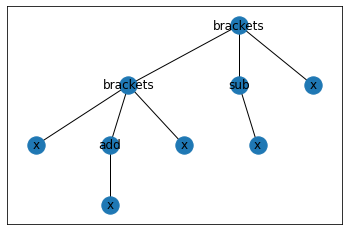

In [22]:
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout
import networkx as nx

g = nx.Graph()
g.add_nodes_from(nodes)
g.add_edges_from(edges)
pos = graphviz_layout(g, prog="dot")

nx.draw_networkx_nodes(g, pos)
nx.draw_networkx_edges(g, pos)
nx.draw_networkx_labels(g, pos, labels)
plt.show()

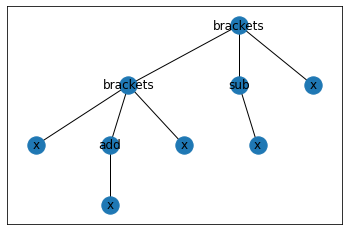

In [23]:
nodes, edges, labels = gp.graph(pop[0])
g = nx.Graph()
g.add_nodes_from(nodes)
g.add_edges_from(edges)
pos = graphviz_layout(g, prog="dot")

nx.draw_networkx_nodes(g, pos)
nx.draw_networkx_edges(g, pos)
nx.draw_networkx_labels(g, pos, labels)
plt.show()

In [ ]:
from deap import gp, base, creator, tools

def add(x):
    return '+' + x

def sub(x):
    return '-' + x

def brackets(a,b,c):
    return a + '[' + b + ']' + c

def F(x):
    return 'F' + x

pset = gp.PrimitiveSet("MAIN", 1)
pset.addPrimitive(add, 1)
pset.addPrimitive(sub, 1)
pset.addPrimitive(F, 1)
pset.addPrimitive(brackets, 3)
pset.addTerminal('')
pset.renameArguments(ARG0='x')

creator.create("Individual", list, fitness=creator.FitnessMax)


toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=3, max_=6)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)

Temp 1 - ED - MAX
Temp 2 - ED - MAX
Temp 3 - IMED - MAX
Temp 3 - IMED - MIN



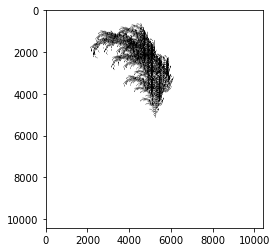

In [28]:
import matplotlib.pyplot as plt

img = cv2.imread('Temp_4/test_20220526091354.950927/test_20220526091354.950927.png')


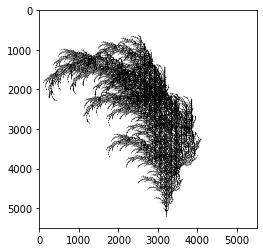

In [33]:
plt.imshow(img[0:5500, 2000:7500])

In [1]:
12500//2

6250